0.9926739926739927
[0.10939546 0.32698159 0.13726046 0.33329041 0.0922263  0.00084578]
flipper_length_mm    0.333290
bill_length_mm       0.326982
bill_depth_mm        0.137260
island               0.109395
body_mass_g          0.092226
sex                  0.000846
dtype: float64


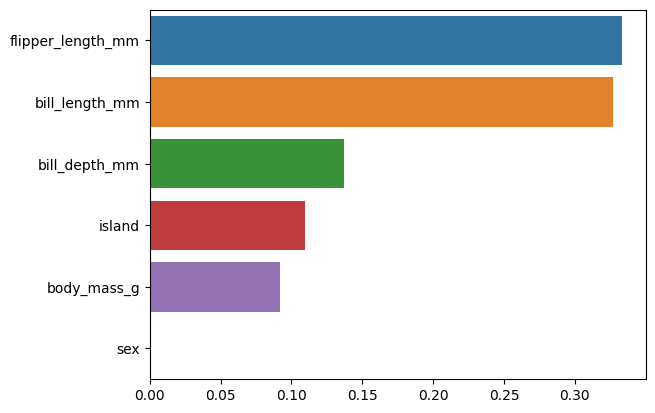

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 결측치 처리
df = pd.read_csv("penguins.csv")
# print(df.loc[df["bill_length_mm"].isna()])
df.dropna(subset=["bill_length_mm"], inplace=True)  # Row drop

df["sex"].fillna("NONE", inplace=True)  # Fill na

# X feature encoding
# df['island'] = df['island'].map({
#     'Biscoe': 0,
#     'Dream': 1,
#     'Torgersen': 2,
# })


# df['sex'] = df['sex'].map({
#     'MALE': 0,
#     'FEMALE': 1,
#     'NONE': 2,
# })

island_encoder = LabelEncoder()
df["island"] = island_encoder.fit_transform(df["island"])

sex_encoder = LabelEncoder()
df["sex"] = sex_encoder.fit_transform(df["sex"])

# X, Y 분리
x = df.drop(['species'], axis=1)
y = df['species']

# 학습셋 분리
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=2022)

# numpy로 변환
x_train = x_train.values
y_train = y_train.values

# 학습
clf = RandomForestClassifier(n_estimators=30, max_depth=3)
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.feature_importances_)

sr = pd.Series(clf.feature_importances_, index=x.columns.values)
sr = sr.sort_values(ascending=False)
print(sr)

sns.barplot(x=sr, y=sr.index)
plt.show()